<h1> Loading Data </h1>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import folium
import webbrowser
from folium import plugins

#Importing Dataset
main_df=pd.read_csv('F:\\Data Science\\Capstone Project IBM\\Data-Collisions.csv', low_memory=False)

<h1> Exploratory Data Analysis </h1>

In [28]:
#Converting Severity Code from (1/2) tp (0/1)
severity_code = main_df['SEVERITYCODE'].values

labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

main_df ["SEVERITYCODE"] = severity_code

#Descriptive Stats
descriptive_stats= main_df.describe(include="all")
descriptive_stats.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.00000,194673.00000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,194673.000000,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,63,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,44421,44421,NaN,NaN,187457
mean,0.298901,-122.330518,47.619543,108479.36493,141091.45635,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9782.451978,NaN


f:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


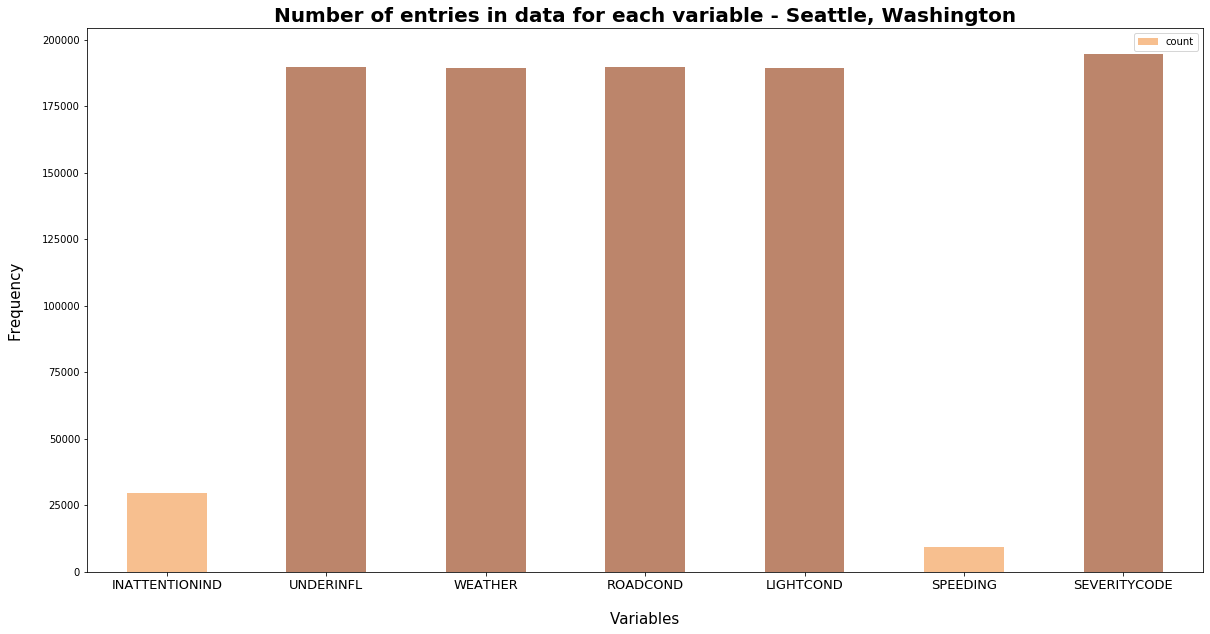

In [29]:
 #Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

color_yo=['sandybrown','sienna','sienna','sienna','sienna','sandybrown','sienna']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo],figsize=(20,10))
plt.title('Number of entries in data for each variable - Seattle, Washington', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360, fontsize=13)
plt.show()


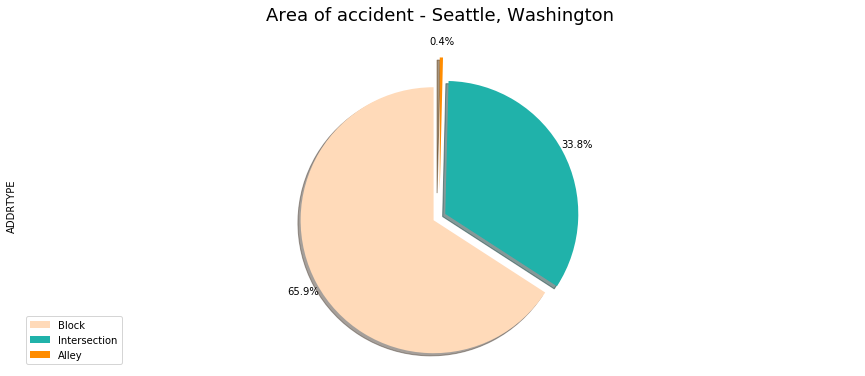

In [30]:
#Area type of each accident
explode_list = [0.05, 0.05, 0.2]
color_list=['peachpuff','lightseagreen','darkorange']
addtype=main_df['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Area of accident - Seattle, Washington', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

In [23]:
#Check IncKey unqiue numbers
main_df['INCKEY'].nunique()

194673

<h1> Preprocessing </h1>

In [26]:
#Encoding in attention (0 = No, 1 = Yes)
main_df["INATTENTIONIND"].replace("Y", 1, inplace=True)
main_df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

#Encoding Under the influence (0 = No, 1 = Yes)
main_df["UNDERINFL"].replace("N", 0, inplace=True)
main_df["UNDERINFL"].replace("Y", 1, inplace=True)

#Encoding Speeding(0 = No, 1 = Yes)
main_df["SPEEDING"].replace("Y", 1, inplace=True)
main_df["SPEEDING"].replace(np.nan, 0, inplace=True)

#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
main_df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
main_df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
main_df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
main_df["WEATHER"].replace("Clear", 0, inplace=True)
main_df["WEATHER"].replace("Raining", 3, inplace=True)
main_df["WEATHER"].replace("Overcast", 1, inplace=True)
main_df["WEATHER"].replace("Other", "Unknown", inplace=True)
main_df["WEATHER"].replace("Snowing", 3, inplace=True)
main_df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
main_df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
main_df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
main_df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
main_df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
main_df["ROADCOND"].replace("Dry", 0, inplace=True)
main_df["ROADCOND"].replace("Wet", 2, inplace=True)
main_df["ROADCOND"].replace("Ice", 2, inplace=True)
main_df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
main_df["ROADCOND"].replace("Other", "Unknown", inplace=True)
main_df["ROADCOND"].replace("Standing Water", 2, inplace=True)
main_df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
main_df["ROADCOND"].replace("Oil", 2, inplace=True)
#Making new dataframe with only variables and unique keys
selected_columns=main_df[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()

np.count_nonzero(feature_df['UNDERINFL'])

    #Light Condition
lightcondsize = feature_df ["LIGHTCOND"].size

featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

    #Road Condition
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

    #Weather Condition
weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)

    #Converting remaining to int
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)

main_df.head()


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,2,0,NaN,NaN,0.0,10,Entering at angle,0,0,N
1,0,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,2,1,NaN,6354039.0,0.0,11,From same direction - both going straight - bo...,0,0,N
2,0,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,0,0,NaN,4323031.0,0.0,32,One parked--one moving,0,0,N
3,0,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,0,0,NaN,NaN,0.0,23,From same direction - all others,0,0,N
4,1,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,2,0,NaN,4028032.0,0.0,10,Entering at angle,0,0,N


<h1> Feature Selection </h1>

In [32]:
#ML Feature Sets
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

#Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)


<h1> Decision Tree Classifier </h1>

In [34]:
#Decision Tree Clasifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(X_train,y_train)

        #Make Prediction:
yhatDT = DT.predict(X_test)

        #Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_test))

        #Visualization
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(yhatDT,y_test))

Accuracy score for Decision Tree =  0.6960055021628567
Confusion Matrix - Decision Tree
Predicted      0   1    All
True                       
0          38421  24  38445
1          16772  34  16806
All        55193  58  55251
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     55193
           1       0.00      0.59      0.00        58

    accuracy                           0.70     55251
   macro avg       0.50      0.64      0.41     55251
weighted avg       1.00      0.70      0.82     55251



Confusion matrix, without normalization
[[   34 16772]
 [   24 38421]]


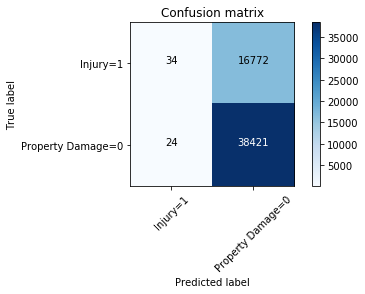

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Plot it
cnf_matrix = confusion_matrix(y_test, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

<h1> Logistic Regression </h1>

f:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.610855714330365
Accuracy 0.6956435177643844
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     38445
           1       0.22      0.00      0.00     16806

    accuracy                           0.70     55251
   macro avg       0.46      0.50      0.41     55251
weighted avg       0.55      0.70      0.57     55251

Confusion matrix, without normalization
[[    4 16802]
 [   14 38431]]


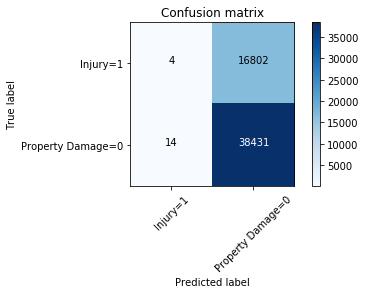

In [37]:
#Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print(log_loss(y_test, yhat_prob))

print ("Accuracy", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))

cnf_matrix = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')